In [3]:
using NetworkEpidemics
using LightGraphs
using Statistics
using Plots
using ColorSchemes
using Random

In [4]:
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SI}) = Metapopulation(mp.h, mp.D, SI(χ*mp.dynamics.β))
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SIS}) = Metapopulation(mp.h, mp.D, SIS(χ*mp.dynamics.β, mp.dynamics.γ))
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SIR}) = Metapopulation(mp.h, mp.D, SIR(χ*mp.dynamics.β, mp.dynamics.δ))

CorrectedMetapopulation (generic function with 3 methods)

In [5]:
Random.seed!(2020);

In [6]:
N = 50
M = 10

10

In [7]:
h = complete_graph(M)
g = cycle_graph(N)

{50, 50} undirected simple Int64 graph

In [8]:
k = degree(g)

50-element Array{Int64,1}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

In [9]:
χ₁ = mean(closeness_centrality(g))
χ₂ = mean(k.^2)/(mean(k)*N)
χ₃ = mean(k)/N #ne(g)/(n*(n-1)/2)
χ₄ = global_clustering_coefficient(g)

0.0

In [20]:
β = 0.1 # transmission rate
D = 0.2 # diffusion rate

0.2

In [21]:
mp = Metapopulation(h, D, SI(β))
mp_1 = CorrectedMetapopulation(χ₁, mp)
mp_2 = CorrectedMetapopulation(χ₂, mp)
mp_3 = CorrectedMetapopulation(χ₃, mp)
mp_4 = CorrectedMetapopulation(χ₄, mp)

mpx = Metaplex(g, h, D, SI(β))

Metaplex{SI}({50, 50} undirected simple Int64 graph, {10, 45} undirected simple Int64 graph, [0.2, 0.2], SI(0.1))

In [12]:
x0_i = fill(1, N)
x0_i[1:10] .= 2
x0_μ = [div(i-1,div(N,M))+1 for i in 1:N]

50-element Array{Int64,1}:
  1
  1
  1
  1
  1
  2
  2
  2
  2
  2
  3
  3
  3
  ⋮
  8
  8
  9
  9
  9
  9
  9
 10
 10
 10
 10
 10

In [13]:
x0_mp = Array{Int,2}(undef, M,2)
x0_mp[2:M,:] .= [100 0]
x0_mp[1, :] .= [0, 100]

2-element view(::Array{Int64,2}, 1, :) with eltype Int64:
   0
 100

In [14]:
# infected seed randomly dispersed over meta-nodes
x0_i = fill(1, N)
x0_i[1:10] .= 2
x0_μ = rand(1:M, N)
x0_mp = zeros(Int, M, 2)
for i in 1:N
    x0_mp[x0_μ[i], x0_i[i]] += 1
end

In [15]:
tmax =2500.0
nmax = 500000
nsims = 200
nbins = 200

200

Be aware! This one takes a while

In [25]:
ts_av_mpx, u_av_mpx = average(mpx, [x0_i,x0_μ], tmax=tmax, nmax=nmax, nbins=nbins, nsims=nsims, progressbar=false);

In [23]:
ts_mf, u_mf = meanfield(mp, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_1, u_mf_1 = meanfield(mp_1, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_2, u_mf_2 = meanfield(mp_2, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_3, u_mf_3 = meanfield(mp_3, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_4, u_mf_4 = meanfield(mp_4, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_mpx, u_mf_mpx = meanfield(mpx, [x0_i,x0_μ], tmax=tmax, saveat=ts_av_mpx)

([0.0, 12.56281407035176, 25.12562814070352, 37.688442211055275, 50.25125628140704, 62.814070351758794, 75.37688442211055, 87.93969849246231, 100.50251256281408, 113.06532663316584  …  2386.9346733668344, 2399.497487437186, 2412.0603015075376, 2424.6231155778896, 2437.185929648241, 2449.7487437185932, 2462.311557788945, 2474.8743718592964, 2487.437185929648, 2500.0], [[2.0 4.0 … 3.0 1.0; 3.858811002941555 3.9763020684117856 … 3.920130320449416 3.797508941983402; … ; 4.7540366864986157e-7 -1.6500624543132252e-6 … 4.7535699895899604e-7 4.774309795090506e-7; -1.5103772475629185e-7 5.191951217777033e-7 … -1.5102406947134935e-7 -1.516780612920995e-7], [0.0 1.0 … 2.0 0.0; 0.9572569165656758 1.023697931588214 … 1.079869679550585 0.9572482840262404; … ; 4.999999524596275 5.000001650062398 … 4.999999524642945 4.999999522568963; 5.000000151037669 4.9999994808048225 … 5.000000151024013 5.000000151678005]])

In [18]:
colors = ColorSchemes.tab10

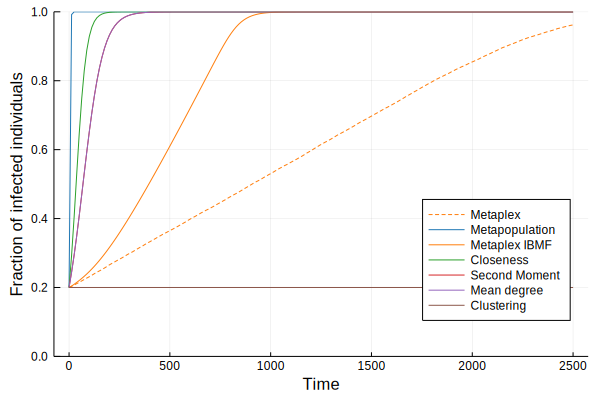

In [26]:
plot(ts_av_mpx, sum(u_av_mpx[2], dims=2)/N,
    label="Metaplex",
    xlabel="Time",
    ylabel="Fraction of infected individuals",
    linestyle=:dash,
    legend=:bottomright,
    color = colors[2],
    ylims = (0.0,1.0)
    )
    plot!(ts_mf, sum(u_mf[2], dims=2)/N,
    #label="Meanfield (No correction)",
    label = "Metapopulation",
#    xlabel="Time",
#    ylabel="Fraction of infected individuals",
    #legend=:bottomright,
    color = colors[1]
    )
    plot!(ts_mf_mpx, sum(u_mf_mpx[2], dims=2)/N,
#    label="Meanfield (Metaplex)",
    label = "Metaplex IBMF",
    color = colors[2]
    )
    plot!(ts_mf_1, sum(u_mf_1[2], dims=2)/N,
#    label="Meanfield (Closeness Centrality)",
    label = "Closeness",
    color = colors[3]
    )
    plot!(ts_mf_2, sum(u_mf_2[2], dims=2)/N,
#    label="Meanfield (Second Moment)",
    label = "Second Moment",
    color = colors[4]
    )
    plot!(ts_mf_3, sum(u_mf_3[2], dims=2)/N,
#    label="Meanfield (Mean degree)",
    label = "Mean degree",
    color = colors[5]
    )
    plot!(ts_mf_4, sum(u_mf_4[2], dims=2)/N,
#    label="Meanfield (Clustering Coefficient)",
    label = "Clustering",
    color = colors[6]
    )